### Coding 2 — Homework 1: Data Cleaning, Feature Engineering, and Regressions

Jiaqi Pan 2500042

----

#### Part I: Data Cleaning

Load all datasets into Python. Print the first few rows and the list of variables for each dataset. Get to know your data.

In [1]:
import warnings

import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from plotnine import *
import matplotlib.pyplot as plt
from stargazer.stargazer import Stargazer

%matplotlib inline
warnings.filterwarnings("ignore")

In [ ]:
# Load all datasets into Python. 

# the first 4 rows of articles and gdp are blank, so here, skiprows=4
articles=pd.read_csv("data/API_IP.JRN.ARTC.SC_DS2_en_csv_v2_2446580.csv", skiprows=4)
gdp=pd.read_csv("data/API_NY.GDP.PCAP.PP.KD_DS2_en_csv_v2_2055943.csv", skiprows=4)

# I have to add encoding='latin-1' for bmi, otherwise it gives an error with something with unicode
bmi=pd.read_csv("data/NCD_RisC_Lancet_2017_BMI_age_standardised_country.csv", encoding='latin-1')

# these datasets can be loaded smoothly
haq=pd.read_csv("data/healthcare-access-and-quality-index.csv")
haq_interpolated=pd.read_csv("data/haq_interpolated.csv")
rd=pd.read_csv("data/rd.csv")
mortality=pd.read_csv("data/mortality.csv")
age=pd.read_csv("data/age.csv")


In [3]:
# Print the first few rows and the list of variables for each dataset. 

# articles
articles.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,Scientific and technical journal articles,IP.JRN.ARTC.SC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,Scientific and technical journal articles,IP.JRN.ARTC.SC,NaN,NaN,NaN,NaN,NaN,NaN,...,34.15,27.81,34.69,22.20,81.64,91.89,111.72,NaN,NaN,NaN
2,Angola,AGO,Scientific and technical journal articles,IP.JRN.ARTC.SC,NaN,NaN,NaN,NaN,NaN,NaN,...,22.38,23.85,33.48,31.59,39.97,55.50,30.12,NaN,NaN,NaN
3,Albania,ALB,Scientific and technical journal articles,IP.JRN.ARTC.SC,NaN,NaN,NaN,NaN,NaN,NaN,...,165.75,162.65,180.39,177.80,185.87,149.54,180.36,NaN,NaN,NaN
4,Andorra,AND,Scientific and technical journal articles,IP.JRN.ARTC.SC,NaN,NaN,NaN,NaN,NaN,NaN,...,3.58,5.26,4.18,8.08,7.99,2.01,3.60,NaN,NaN,NaN


In [4]:
# print(articles.columns.tolist())
# here is a problem: in the end of this list there is an empty column 'Unnamed: 65'
# I dropped it
articles=articles.drop(columns=['Unnamed: 65'])
print(articles.columns.tolist())

['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']


In [5]:
# gdp
gdp.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,34329.774218,35563.310960,35458.608343,37276.080417,37866.173853,38442.413838,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,2075.491747,2116.465454,2102.385234,2068.265904,2057.062164,2058.383832,2033.779002,2065.036398,NaN,NaN
2,Angola,AGO,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,8036.690482,8140.527851,8239.828837,8036.410610,7568.997643,7310.901738,6933.505560,6670.332297,NaN,NaN
3,Albania,ALB,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,11263.851342,11397.576226,11623.866679,11916.422315,12331.127754,12811.759436,13366.303065,13724.058790,NaN,NaN
4,Andorra,AND,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# print(gdp.columns.tolist())
# in the end of this list there is also an empty column 'Unnamed: 65'
# I dropped it
gdp=gdp.drop(columns=['Unnamed: 65'])
print(gdp.columns.tolist())

['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']


In [7]:
# bmi
bmi.head(5)

,Country/Region/World,ISO,Sex,Year,Mean BMI,Mean BMI lower 95% uncertainty interval,Mean BMI upper 95% uncertainty interval,Prevalence of BMI>=30 kg/m² (obesity),Prevalence of BMI>=30 kg/m² lower 95% uncertainty interval,Prevalence of BMI>=30 kg/m² upper 95% uncertainty interval,...,Prevalence of BMI 25 kg/m² to <30 kg/m² upper 95% uncertainty interval,Prevalence of BMI 30 kg/m² to <35 kg/m²,Prevalence of BMI 30 kg/m² to <35 kg/m² lower 95% uncertainty interval,Prevalence of BMI 30 kg/m² to <35 kg/m² upper 95% uncertainty interval,Prevalence of BMI 35 kg/m² to <40 kg/m²,Prevalence of BMI 35 kg/m² to <40 kg/m² lower 95% uncertainty interval,Prevalence of BMI 35 kg/m² to <40 kg/m² upper 95% uncertainty interval,Prevalence of BMI >=40 kg/m²(morbid obesity),Prevalence of BMI >=40 kg/m² lower 95% uncertainty interval,Prevalence of BMI >=40 kg/m² upper 95% uncertainty interval
0,Afghanistan,AFG,Men,1975.0,18.999440,16.331119,21.763077,0.002078,0.000384,0.006515,...,0.096419,0.002043,0.000351,0.006493,0.000027,6.660000e-07,0.000138,0.000008,5.050000e-08,0.000047
1,Afghanistan,AFG,Men,1976.0,19.105518,16.500077,21.801109,0.002237,0.000437,0.006820,...,0.097881,0.002199,0.000403,0.006779,0.000030,8.530000e-07,0.000149,0.000009,6.820000e-08,0.000049
2,Afghanistan,AFG,Men,1977.0,19.212080,16.646507,21.842021,0.002410,0.000497,0.007179,...,0.098869,0.002368,0.000454,0.007144,0.000033,1.080000e-06,0.000163,0.000009,9.260000e-08,0.000053
3,Afghanistan,AFG,Men,1978.0,19.319053,16.786899,21.876516,0.002599,0.000559,0.007567,...,0.100453,0.002551,0.000519,0.007540,0.000037,1.360000e-06,0.000178,0.000010,1.260000e-07,0.000057
4,Afghanistan,AFG,Men,1979.0,19.425952,16.950002,21.930634,0.002804,0.000636,0.008026,...,0.102426,0.002751,0.000581,0.007971,0.000041,1.700000e-06,0.000193,0.000012,1.580000e-07,0.000063


In [8]:
print(bmi.columns.tolist())

['Country/Region/World', 'ISO', 'Sex', 'Year', 'Mean BMI', 'Mean BMI lower 95% uncertainty interval', 'Mean BMI upper 95% uncertainty interval', 'Prevalence of BMI>=30 kg/m² (obesity)', 'Prevalence of BMI>=30 kg/m² lower 95% uncertainty interval', 'Prevalence of BMI>=30 kg/m² upper 95% uncertainty interval', 'Prevalence of BMI>=35 kg/m² (severe obesity)', 'Prevalence of BMI>=35 kg/m² lower 95% uncertainty interval', 'Prevalence of BMI>=35 kg/m² upper 95% uncertainty interval', 'Prevalence of BMI<18.5 kg/m² (underweight)', 'Prevalence of BMI<18.5 kg/m² lower 95% uncertainty interval', 'Prevalence of BMI<18.5 kg/m² upper 95% uncertainty interval', 'Prevalence of BMI 18.5 kg/m² to <20 kg/m²', 'Prevalence of BMI 18.5 kg/m² to <20 kg/m² lower 95% uncertainty interval', 'Prevalence of BMI 18.5 kg/m² to <20 kg/m² upper 95% uncertainty interval', 'Prevalence of BMI 20 kg/m² to <25 kg/m²', 'Prevalence of BMI 20 kg/m² to <25 kg/m² lower 95% uncertainty interval', 'Prevalence of BMI 20 kg/m² to <

In [9]:
# haq
haq.head(5)

,Entity,Code,Year,HAQ Index (IHME (2017))
0,Afghanistan,AFG,1990,24.7
1,Afghanistan,AFG,1995,24.5
2,Afghanistan,AFG,2000,24.8
3,Afghanistan,AFG,2005,27.1
4,Afghanistan,AFG,2010,29.4


In [10]:
print(haq.columns.tolist())

['Entity', 'Code', 'Year', 'HAQ Index (IHME (2017))']


In [11]:
# haq_interpolated
haq_interpolated.head(5)

,country_code,year,haq_interpolated
0,AFG,1990,24.70
1,AFG,1991,24.66
2,AFG,1992,24.62
3,AFG,1993,24.58
4,AFG,1994,24.54


In [12]:
print(haq_interpolated.columns.tolist())

['country_code', 'year', 'haq_interpolated']


In [13]:
# rd
rd.head(5)

,country_code,year,rd
0,AUS,2013,33471500.0
1,AUS,2015,31179000.0
2,AUS,2017,33062000.0
3,AUT,2013,9571282.0
4,AUT,2014,10275180.0


In [14]:
print(rd.columns.tolist())

['country_code', 'year', 'rd']


In [15]:
# mortality
mortality.head(5)

,Country,Code,Cases,Deaths,Population,Mortality
0,World,NaN,159634316,3318844.0,7.757957e+09,0.020790
1,USA,USA,33515308,596179.0,3.326644e+08,0.017788
2,India,IND,22992517,250025.0,1.391605e+09,0.010874
3,Brazil,BRA,15214030,423436.0,2.138525e+08,0.027832
4,France,FRA,5780379,106684.0,6.539730e+07,0.018456


In [16]:
print(mortality.columns.tolist())

['Country', 'Code', 'Cases', 'Deaths', 'Population', 'Mortality']


In [17]:
# age
age.head(5)

,Entity,Code,Year,UN Population Division (Median Age) (2017)
0,Afghanistan,AFG,1950,19.400000
1,Afghanistan,AFG,1955,19.200001
2,Afghanistan,AFG,1960,18.799999
3,Afghanistan,AFG,1965,18.400000
4,Afghanistan,AFG,1970,17.900000


In [18]:
print(age.columns.tolist())

['Entity', 'Code', 'Year', 'UN Population Division (Median Age) (2017)']


---

World Bank Data

1.1. For these datasets (articles, GDP per capita), look for:
- the country identifier and country name variables,
- the variables representing years,
- the indicator column.

1.2. Write a function that pivots the data, and transforms it into a tidy “long” format, with columns:
country_code, country_name, year, value.
Apply this function to both datasets.


In [19]:
# 1.1
# articles:
# the country identifier and country name variables
print("articles:")
print("the country identifier and country name variables:")
articles.filter(["Country Code","Country Name"]).head(5)


articles:
the country identifier and country name variables:


,Country Code,Country Name
0,ABW,Aruba
1,AFG,Afghanistan
2,AGO,Angola
3,ALB,Albania
4,AND,Andorra


In [20]:
# the variables representing years
print("articles:")
print("the variables representing years:")
articles.iloc[:,4:].head(5)

articles:
the variables representing years:


,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,39.62,34.15,27.81,34.69,22.20,81.64,91.89,111.72,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,17.78,22.38,23.85,33.48,31.59,39.97,55.50,30.12,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,146.82,165.75,162.65,180.39,177.80,185.87,149.54,180.36,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.91,3.58,5.26,4.18,8.08,7.99,2.01,3.60,NaN,NaN


In [21]:
# the indicator column
print("articles:")
print("the indicator column:")
articles.filter(["Indicator Code", "Indicator Name"]).head(5)

articles:
the indicator column:


,Indicator Code,Indicator Name
0,IP.JRN.ARTC.SC,Scientific and technical journal articles
1,IP.JRN.ARTC.SC,Scientific and technical journal articles
2,IP.JRN.ARTC.SC,Scientific and technical journal articles
3,IP.JRN.ARTC.SC,Scientific and technical journal articles
4,IP.JRN.ARTC.SC,Scientific and technical journal articles


In [22]:
# gdp:
# the country identifier and country name variables
print("gdp:")
print("the country identifier and country name variables:")
gdp.filter(["Country Code", "Country Name"]).head(5)

gdp:
the country identifier and country name variables:


,Country Code,Country Name
0,ABW,Aruba
1,AFG,Afghanistan
2,AGO,Angola
3,ALB,Albania
4,AND,Andorra


In [23]:
# the variables representing years
print("gdp:")
print("the variables representing years:")
gdp.iloc[:,4:].head(5)

gdp:
the variables representing years:


,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,34981.895419,34329.774218,35563.310960,35458.608343,37276.080417,37866.173853,38442.413838,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1904.559799,2075.491747,2116.465454,2102.385234,2068.265904,2057.062164,2058.383832,2033.779002,2065.036398,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7675.445768,8036.690482,8140.527851,8239.828837,8036.410610,7568.997643,7310.901738,6933.505560,6670.332297,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11088.087801,11263.851342,11397.576226,11623.866679,11916.422315,12331.127754,12811.759436,13366.303065,13724.058790,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# the indicator column
print("gdp:")
print("the indicator column:")
gdp.filter(["Indicator Code", "Indicator Name"]).head(5)

gdp:
the indicator column:


,Indicator Code,Indicator Name
0,NY.GDP.PCAP.PP.KD,"GDP per capita, PPP (constant 2017 internation..."
1,NY.GDP.PCAP.PP.KD,"GDP per capita, PPP (constant 2017 internation..."
2,NY.GDP.PCAP.PP.KD,"GDP per capita, PPP (constant 2017 internation..."
3,NY.GDP.PCAP.PP.KD,"GDP per capita, PPP (constant 2017 internation..."
4,NY.GDP.PCAP.PP.KD,"GDP per capita, PPP (constant 2017 internation..."


In [25]:
# 1.2
# Write a function that pivots the data, and transforms it into a tidy long format, 
# with columns: country_code, country_name, year, value.

def long(df):
    """
    pivots the df, 
    transforms it into a tidy long format, which means each row is an observation (many rows of observations of the same country in different years))
    and renames the columns to: country_code, country_name, year, value.

    inside pd.melt:
    id_vars=["Country Code","Country Name"]: means that "Country Code","Country Name" will still be columns in df_long
    var_name="year": means that in df_long, there will be a new column "year"
    value_name="value": just saves all the values into a new column "value" in df_long

    (I have to drop "Indicator Name","Indicator Code" first separately, otherwise they will still be showed in df_long)
    """
    df1=df.drop(columns=["Indicator Name","Indicator Code"])
    df_long=pd.melt(df1,id_vars=["Country Code","Country Name"],var_name="year",value_name="value")
    df_long=df_long.rename(columns={"Country Code":"country_code","Country Name":"country_name"})
    return df_long


In [26]:
# Apply this function to both datasets

articles_long=long(articles)
articles_long.head(15)

,country_code,country_name,year,value
0,ABW,Aruba,1960,NaN
1,AFG,Afghanistan,1960,NaN
2,AGO,Angola,1960,NaN
3,ALB,Albania,1960,NaN
4,AND,Andorra,1960,NaN
5,ARB,Arab World,1960,NaN
6,ARE,United Arab Emirates,1960,NaN
7,ARG,Argentina,1960,NaN
8,ARM,Armenia,1960,NaN
9,ASM,American Samoa,1960,NaN


In [27]:
gdp_long=long(gdp)
gdp_long.head(15)

,country_code,country_name,year,value
0,ABW,Aruba,1960,NaN
1,AFG,Afghanistan,1960,NaN
2,AGO,Angola,1960,NaN
3,ALB,Albania,1960,NaN
4,AND,Andorra,1960,NaN
5,ARB,Arab World,1960,NaN
6,ARE,United Arab Emirates,1960,NaN
7,ARG,Argentina,1960,NaN
8,ARM,Armenia,1960,NaN
9,ASM,American Samoa,1960,NaN


---

Non-WB Datasets

2.1. Body Mass Index (BMI) Data:
- Keep only the columns: ISO code, year, sex, and mean BMI.
- Rename variables so that they follow the convention:
country_code, year, sex, mean_bmi.
- Reshape the dataset so that each row corresponds to a unique country–year pair with two new variables:
bmi_men,  bmi_women.

2.2. Healthcare Access and Quality (HAQ) data:
- Identify the correct country code and year variables.
- Keep only: country_code, year, haq_index.
- Drop rows where the country code is missing (these usually correspond to regional aggregates).

In [28]:
# 2.1 bmi
# Keep only the columns: ISO code, year, sex, and mean BMI

bmi=bmi.filter(["ISO","Year","Sex","Mean BMI"])
bmi.head(5)


,ISO,Year,Sex,Mean BMI
0,AFG,1975.0,Men,18.999440
1,AFG,1976.0,Men,19.105518
2,AFG,1977.0,Men,19.212080
3,AFG,1978.0,Men,19.319053
4,AFG,1979.0,Men,19.425952


In [29]:
# Rename variables so that they follow the convention: country_code, year, sex, mean_bmi

bmi=bmi.rename(columns={"ISO":"country_code","Year":"year","Sex":"sex","Mean BMI":"mean_bmi"})
bmi.head(5)

,country_code,year,sex,mean_bmi
0,AFG,1975.0,Men,18.999440
1,AFG,1976.0,Men,19.105518
2,AFG,1977.0,Men,19.212080
3,AFG,1978.0,Men,19.319053
4,AFG,1979.0,Men,19.425952


In [30]:
# Reshape the dataset so that each row corresponds to a unique country–year pair with two new variables: bmi_men,  bmi_women
bmi_short=pd.pivot_table(bmi,
    index=["country_code","year"],
    columns="sex",
    values="mean_bmi"
).reset_index().rename(columns={
    "Men":"bmi_men",
    "Women":"bmi_women"
})

# I don't understand why column "mean_bmi" is still mentioned in the instructions later, so I guess "mean_bmi" just means mean_bmi of both genders
# so I added a new column "bmi_mean" but it's not equal to the original "mean_bmi" column in original dataset
bmi_short["bmi_mean"]=(bmi_short["bmi_men"]+bmi_short["bmi_women"])/2 
bmi_short.head(5)

sex,country_code,year,bmi_men,bmi_women,bmi_mean
0,AFG,1975.0,18.999440,18.844326,18.921883
1,AFG,1976.0,19.105518,18.986417,19.045968
2,AFG,1977.0,19.212080,19.128086,19.170083
3,AFG,1978.0,19.319053,19.269247,19.294150
4,AFG,1979.0,19.425952,19.409477,19.417714


In [31]:
# 2.2
# haq
# Identify the correct country code and year variables.
haq.filter(["Code","Year"]).head(5)

,Code,Year
0,AFG,1990
1,AFG,1995
2,AFG,2000
3,AFG,2005
4,AFG,2010


In [32]:
# Keep only: country_code, year, haq_index.
# Drop rows where the country code is missing (these usually correspond to regional aggregates).
haq=haq.rename(columns={"Code":"country_code","Year":"year","HAQ Index (IHME (2017))":"haq_index"})
haq=haq.filter(["country_code","year","haq_index"])
haq=haq.dropna()
haq.head(5)

,country_code,year,haq_index
0,AFG,1990,24.7
1,AFG,1995,24.5
2,AFG,2000,24.8
3,AFG,2005,27.1
4,AFG,2010,29.4


---

Country-Code Consistency and Merging

3.1. For each pair of datasets, print the country codes that appear in one dataset but not the other i.e. sequentially report:
- Country codes in articles but NOT in GDP,
- Country codes in GDP but NOT in articles:,
- Country codes in articles but NOT in BMI,
- Country codes in articles but NOT in HAQ,

3.2. Merge all datasets into a single pandas DataFrame using:
on = [country code, year],
how = ‘‘outer’’.
Report the total number of country–year observations.

3.3. Using sns.heatmap(), make a 2×2 plot of missing observations for the following variables:
  Number of research articles published, gdp per capita, mean BMI, and HAQ.

In [33]:
# 3.1
# For each pair of datasets, print the country codes that appear in one dataset but not the other

# empty lists to store all codes
articles_gdp=[]
gdp_articles=[]
articles_bmi=[]
articles_haq=[]

for code in articles_long["country_code"].unique():
    # Country codes in articles but NOT in GDP
    if (code in gdp_long["country_code"].unique())==False:
        articles_gdp.append(code)
    # Country codes in articles but NOT in BMI
    if (code in bmi_short["country_code"].unique())==False:
        articles_bmi.append(code)
    # Country codes in articles but NOT in HAQ
    if (code in haq["country_code"].unique())==False:
        articles_haq.append(code)

# Country codes in GDP but NOT in articles
for code in gdp_long["country_code"].unique():
    if (code in articles_long["country_code"].unique())==False:
        gdp_articles.append(code)

print("Country codes in articles but NOT in GDP:")
print(articles_gdp)
print("Country codes in GDP but NOT in articles:")
print(gdp_articles)
print("Country codes in articles but NOT in BMI:")
print(articles_bmi)
print("Country codes in articles but NOT in HAQ:")
print (articles_haq)

Country codes in articles but NOT in GDP:
[]
Country codes in GDP but NOT in articles:
[]
Country codes in articles but NOT in BMI:
['ABW', 'ARB', 'CEB', 'CHI', 'CSS', 'CUW', 'CYM', 'EAP', 'EAR', 'EAS', 'ECA', 'ECS', 'EMU', 'EUU', 'FCS', 'FRO', 'GIB', 'GUM', 'HIC', 'HPC', 'IBD', 'IBT', 'IDA', 'IDB', 'IDX', 'IMN', 'INX', 'LAC', 'LCN', 'LDC', 'LIC', 'LIE', 'LMC', 'LMY', 'LTE', 'MAC', 'MAF', 'MCO', 'MEA', 'MIC', 'MNA', 'MNP', 'NAC', 'NCL', 'OED', 'OSS', 'PRE', 'PSS', 'PST', 'SAS', 'SMR', 'SSA', 'SSD', 'SSF', 'SST', 'SXM', 'TCA', 'TEA', 'TEC', 'TLA', 'TMN', 'TSA', 'TSS', 'UMC', 'VGB', 'VIR', 'WLD', 'XKX']
Country codes in articles but NOT in HAQ:
['ABW', 'ARB', 'BHS', 'CEB', 'CHI', 'CSS', 'CUW', 'CYM', 'EAP', 'EAR', 'EAS', 'ECA', 'ECS', 'EMU', 'EUU', 'FCS', 'FRO', 'GIB', 'HIC', 'HKG', 'HPC', 'IBD', 'IBT', 'IDA', 'IDB', 'IDX', 'IMN', 'INX', 'KNA', 'LAC', 'LCN', 'LDC', 'LIC', 'LIE', 'LMC', 'LMY', 'LTE', 'MAC', 'MAF', 'MCO', 'MEA', 'MIC', 'MNA', 'NAC', 'NCL', 'NRU', 'OED', 'OSS', 'PLW', 'PRE'

In [34]:
# 3.2
# Merge all datasets into a single pandas DataFrame using: on = [country code, year], how = ''outer''.

# First, I merge articles_long and gdp_long. These two dataframes don't show errors
worldbank=pd.merge(articles_long,gdp_long,on = ["country_code", "year"],how = 'outer')
worldbank=worldbank.rename(columns={"value_x":"articles","value_y":"gdp"})
worldbank.head(5)


,country_code,country_name_x,year,articles,country_name_y,gdp
0,ABW,Aruba,1960,NaN,Aruba,NaN
1,ABW,Aruba,1961,NaN,Aruba,NaN
2,ABW,Aruba,1962,NaN,Aruba,NaN
3,ABW,Aruba,1963,NaN,Aruba,NaN
4,ABW,Aruba,1964,NaN,Aruba,NaN


In [35]:
print("bmi[year].dtype", bmi["year"].dtype, "worldbank[year].dtype", worldbank["year"].dtype)
# It turned out that bmi["year"] is float64 and worldbank["year"] is object.
# So here, I change worldbank["year"] to float64 first, and then merge.
worldbank["year"]=worldbank["year"].astype(float)
print("bmi[year].dtype:",bmi["year"].dtype,"worldbank[year].dtype:",worldbank["year"].dtype)
wb_bmi=pd.merge(worldbank,bmi_short,on = ["country_code", "year"],how = 'outer')
wb_bmi_haq=pd.merge(wb_bmi,haq,on = ["country_code", "year"],how = 'outer')
wb_bmi_haq=wb_bmi_haq.drop(columns=["country_name_y"])
wb_bmi_haq=wb_bmi_haq.rename(columns={"country_name_x":"country_name"})
wb_bmi_haq.head(5)

bmi[year].dtype float64 worldbank[year].dtype object
bmi[year].dtype: float64 worldbank[year].dtype: float64


,country_code,country_name,year,articles,gdp,bmi_men,bmi_women,bmi_mean,haq_index
0,ABW,Aruba,1960.0,NaN,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,1961.0,NaN,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,1962.0,NaN,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,1963.0,NaN,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,1964.0,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
# Report the total number of country_year observations.
print("total number of country_year observations:")
print(len(wb_bmi_haq[['country_code','year']].drop_duplicates()))

total number of country_year observations:
16278


In [37]:
# 3.3
# Using sns.heatmap(), make a 2×2 plot of missing observations for the following variables:
# Number of research articles published, gdp per capita, mean BMI, and HAQ.


# I copied the example in seaborn heatmap webpage and changed "glue" to my dataframe, but I don't really understand why pd.pivot works. 
# I originally tried pd.melt, but it turned out to give a "long" format, but here I want a "wide" format for "year" on x axis. So maybe this is why pd.pivot works better here
# glue = sns.load_dataset("glue").pivot(index="Model", columns="Task", values="Score")
# sns.heatmap(glue)

articles_miss=wb_bmi_haq.pivot(index="country_code", columns="year", values="articles")
articles_miss.head(10)


year,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,1967.0,1968.0,1969.0,...,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
country_code,,,,,,,,,,,,,,,,,,,,,
ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,39.62,34.15,27.81,34.69,22.20,81.64,91.89,111.72,NaN,NaN
AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,17.78,22.38,23.85,33.48,31.59,39.97,55.50,30.12,NaN,NaN
ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,146.82,165.75,162.65,180.39,177.80,185.87,149.54,180.36,NaN,NaN
AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.91,3.58,5.26,4.18,8.08,7.99,2.01,3.60,NaN,NaN
ARB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27827.58,31593.37,35017.79,37822.70,40957.60,45676.13,50420.03,58771.07,NaN,NaN
ARE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1421.83,1625.96,1765.77,1816.50,2294.58,2484.16,2899.67,3144.89,NaN,NaN
ARG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7733.75,7842.75,7994.13,8464.74,8370.01,8593.36,8704.30,8811.13,NaN,NaN
ARM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,586.85,548.17,539.92,544.54,531.24,530.82,511.24,521.33,NaN,NaN


In [38]:
gdp_miss=wb_bmi_haq.pivot(index="country_code", columns="year", values="gdp")
gdp_miss.head(10)


year,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,1967.0,1968.0,1969.0,...,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
country_code,,,,,,,,,,,,,,,,,,,,,
ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,34981.895419,34329.774218,35563.310960,35458.608343,37276.080417,37866.173853,38442.413838,NaN,NaN,NaN
AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1904.559799,2075.491747,2116.465454,2102.385234,2068.265904,2057.062164,2058.383832,2033.779002,2065.036398,NaN
AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7675.445768,8036.690482,8140.527851,8239.828837,8036.410610,7568.997643,7310.901738,6933.505560,6670.332297,NaN
ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11088.087801,11263.851342,11397.576226,11623.866679,11916.422315,12331.127754,12811.759436,13366.303065,13724.058790,NaN
AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ARB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13531.438796,14032.961703,14155.876986,14219.562395,14441.436785,14663.549625,14555.474921,14622.065826,14602.938214,NaN
ARE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,56123.486157,57390.713079,59921.734803,62378.657439,65218.792273,66510.867462,67183.626557,66968.269855,67119.132637,NaN
ARG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24647.629275,24118.867517,24424.136448,23550.099061,23933.886613,23189.527446,23597.117753,22759.398560,22063.904372,NaN
ARM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9725.271468,10397.690707,10691.309955,11019.838785,11321.355759,11303.071699,12115.057009,12714.958188,13653.749532,NaN


In [39]:
meanbmi_miss=wb_bmi_haq.pivot(index="country_code", columns="year", values="bmi_mean")
meanbmi_miss.head(10)


year,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,1967.0,1968.0,1969.0,...,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
country_code,,,,,,,,,,,,,,,,,,,,,
ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,22.928318,23.033418,23.139556,23.245761,23.352089,23.458295,NaN,NaN,NaN,NaN
AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,22.931746,23.028554,23.124415,23.219483,23.313712,23.406520,NaN,NaN,NaN,NaN
ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26.356262,26.453114,26.550189,26.647416,26.744745,26.840991,NaN,NaN,NaN,NaN
AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26.965342,26.948272,26.929531,26.910591,26.892113,26.875028,NaN,NaN,NaN,NaN
ARB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ARE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,28.541104,28.615444,28.689886,28.764480,28.839012,28.913083,NaN,NaN,NaN,NaN
ARG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27.370941,27.477168,27.584354,27.692223,27.800354,27.908135,NaN,NaN,NaN,NaN
ARM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26.212225,26.263296,26.314662,26.366242,26.417451,26.469201,NaN,NaN,NaN,NaN


In [40]:
haq_miss=wb_bmi_haq.pivot(index="country_code", columns="year", values="haq_index")
haq_miss.head(10)

year,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,1967.0,1968.0,1969.0,...,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
country_code,,,,,,,,,,,,,,,,,,,,,
ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,32.5,NaN,NaN,NaN,NaN,NaN
AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,40.7,NaN,NaN,NaN,NaN,NaN
ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,78.2,NaN,NaN,NaN,NaN,NaN
AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,94.6,NaN,NaN,NaN,NaN,NaN
ARB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ARE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,72.2,NaN,NaN,NaN,NaN,NaN
ARG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,68.4,NaN,NaN,NaN,NaN,NaN
ARM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,67.5,NaN,NaN,NaN,NaN,NaN


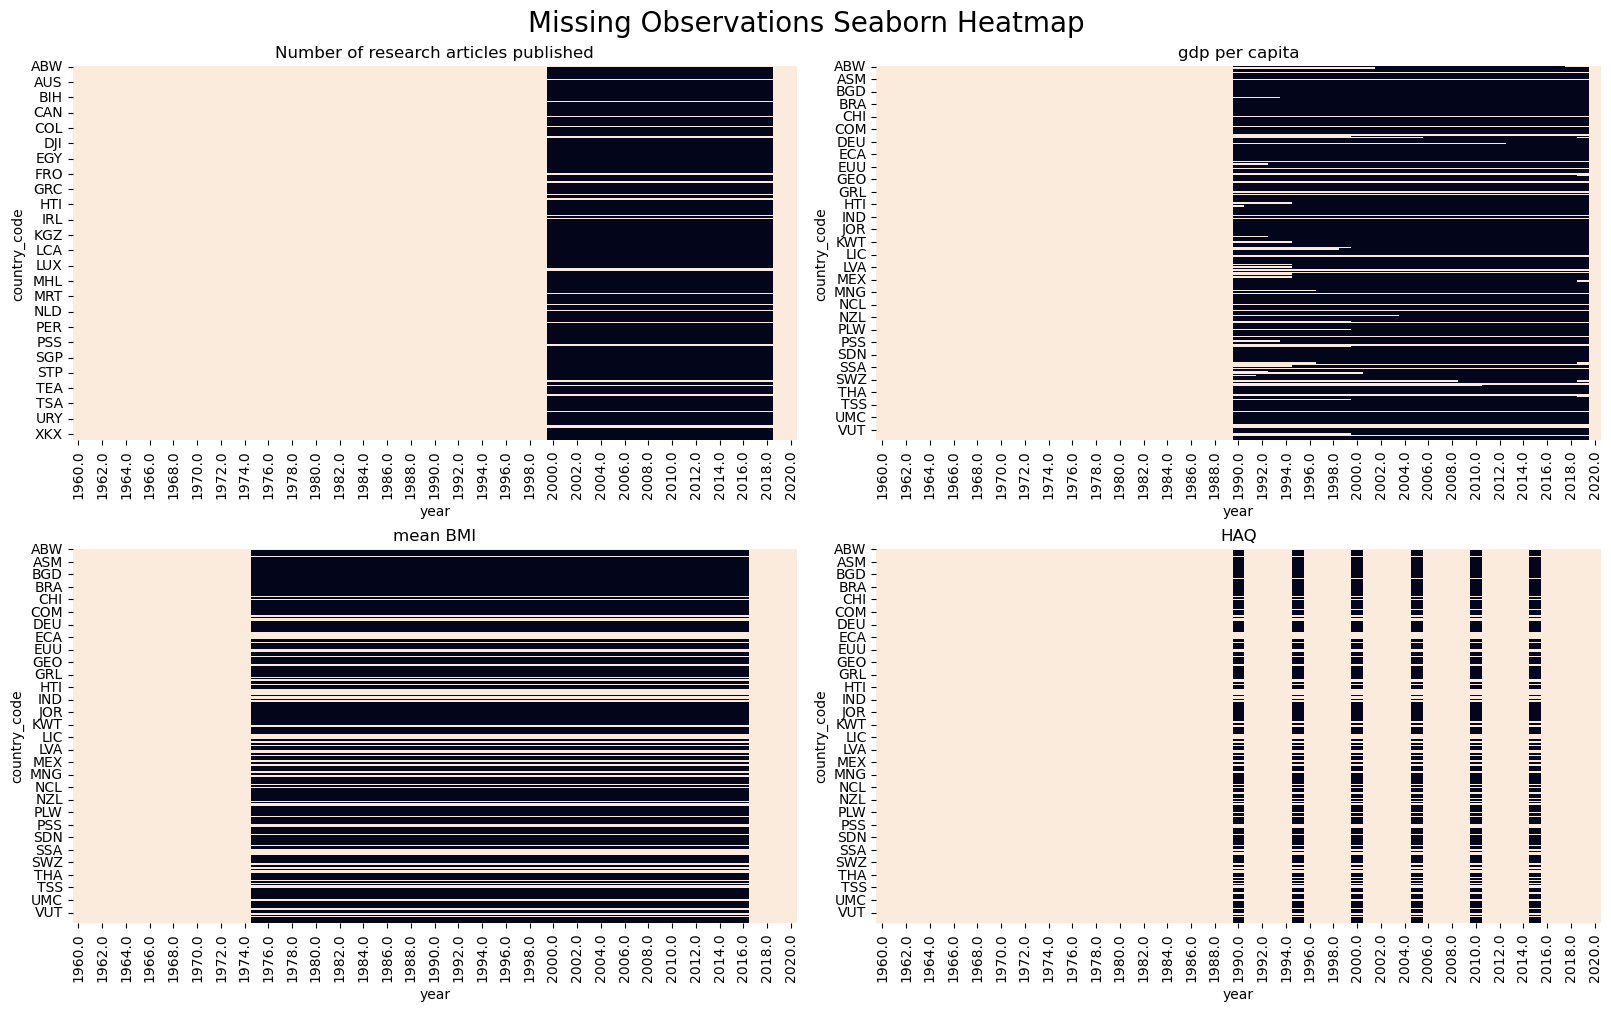

In [41]:

fig, axes = plt.subplots(2,2,figsize=(16, 10), constrained_layout=True)   
# 2*2 format, "constrained_layout=True" is for the title not to overlap with the plots

# store dfs and titles in lists, otherwise I can't include them in the for loop
miss_dfs=[articles_miss,gdp_miss,meanbmi_miss,haq_miss]     
titles=["Number of research articles published", "gdp per capita", "mean BMI", "HAQ"]

for i in range(4):
    ax1=axes[i//2,i%2]                                     
    # i//2,i%2 stands for the order of the plots,(0,0) (0,1) (1,0) (1,1)
    # thus, ax1 is the i_th plot    
    sns.heatmap(data=miss_dfs[i].isnull(),cbar=False,ax=ax1)
    # cbar=False: means that there won't be a color bar on the right side
    ax1.set_xlabel('year')                                 
    ax1.set_ylabel('country_code')   
    ax1.set_title(titles[i])

  
plt.suptitle('Missing Observations Seaborn Heatmap', fontsize=20)
plt.show()




---
4 is missing

Interpolating HAQ, Re-Merging

We need to add one more column to our merged dataframe: Interpolated BMI.

5.1. Merge the merged dataframe from the previous part with interpolated BMI.

5.2. Make the same 2 × 2 plot again, except change BMI by interpolated BMI. What did the interpolation do?



Is this a typo?? I believe it is, here it should be Interpolated HAQ instead of Interpolated BMI.

I am using Interpolated HAQ here.

In [42]:
# 5.1
# Merge the merged dataframe from the previous part with interpolated HAQ.

wb_bmi_haq=pd.merge(wb_bmi_haq,haq_interpolated,on = ["country_code", "year"],how = 'outer')
wb_bmi_haq.head(10)


,country_code,country_name,year,articles,gdp,bmi_men,bmi_women,bmi_mean,haq_index,haq_interpolated
0,ABW,Aruba,1960.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,1961.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,1962.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,1963.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,1964.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,ABW,Aruba,1965.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,ABW,Aruba,1966.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,ABW,Aruba,1967.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,ABW,Aruba,1968.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,ABW,Aruba,1969.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
# 5.2
# Make the same 2 × 2 plot again, except change BMI by interpolated BMI. 
# What did the interpolation do?


# First, pivot haq_interpolated, as above
haq_interpolated_miss=wb_bmi_haq.pivot(index="country_code", columns="year", values="haq_index")
haq_interpolated_miss.head(10)


year,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,1967.0,1968.0,1969.0,...,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
country_code,,,,,,,,,,,,,,,,,,,,,
ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,32.5,NaN,NaN,NaN,NaN,NaN
AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,40.7,NaN,NaN,NaN,NaN,NaN
ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,78.2,NaN,NaN,NaN,NaN,NaN
AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,94.6,NaN,NaN,NaN,NaN,NaN
ARB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ARE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,72.2,NaN,NaN,NaN,NaN,NaN
ARG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,68.4,NaN,NaN,NaN,NaN,NaN
ARM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,67.5,NaN,NaN,NaN,NaN,NaN


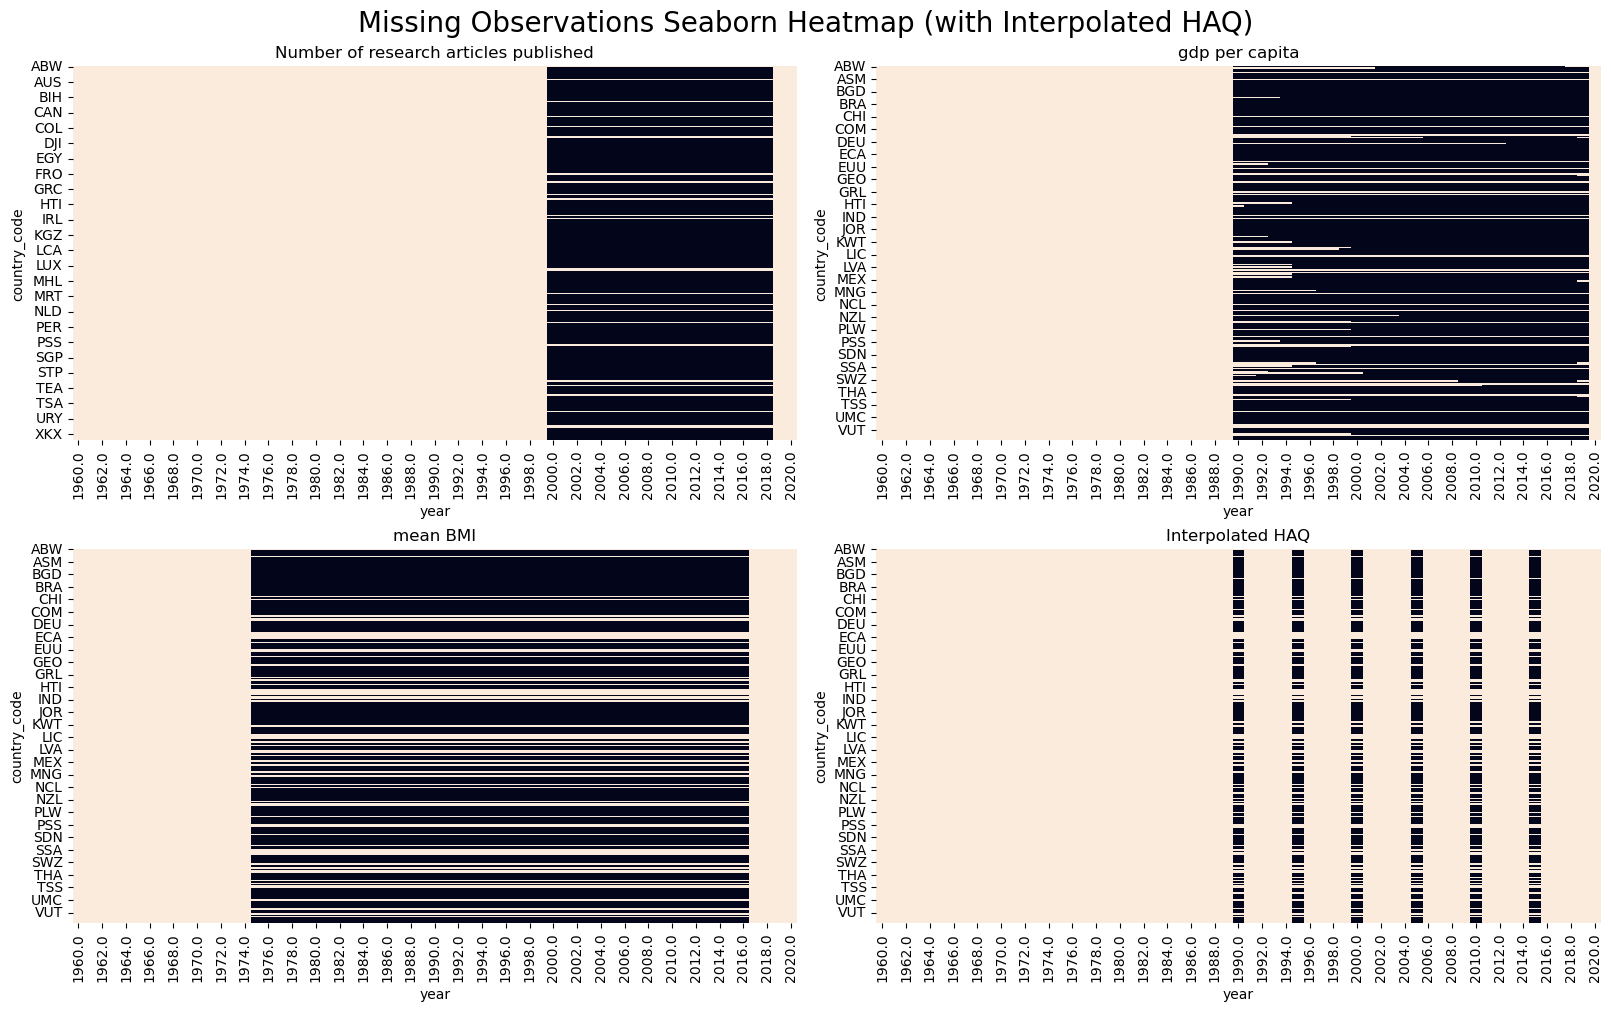

In [44]:

fig, axes = plt.subplots(2,2,figsize=(16, 10), constrained_layout=True)   
# 2*2 format, "constrained_layout=True" is for the title not to overlap with the plots

# store dfs and titles in lists, otherwise I can't include them in the for loop
miss_dfs=[articles_miss,gdp_miss,meanbmi_miss,haq_interpolated_miss]     
titles=["Number of research articles published", "gdp per capita", "mean BMI", "Interpolated HAQ"]
for i in range(4):
    ax1=axes[i//2,i%2]                                     
    # i//2,i%2 stands for the order of the plots,(0,0) (0,1) (1,0) (1,1)
    # thus, ax1 is the i_th plot    
    # cbar=False: means that there won't be a color bar on the right side 
    sns.heatmap(data=miss_dfs[i].isnull(),cbar=False,ax=ax1)
    ax1.set_xlabel('year')                                 
    ax1.set_ylabel('country_code')   
    ax1.set_title(titles[i])

  
plt.suptitle('Missing Observations Seaborn Heatmap (with Interpolated HAQ)', fontsize=20)
plt.show()

I can't see any difference in the two heatmaps with HAQ and Interpolated HAQ. Thus, they roughly have the same missing obervations distribution.<br>
The main difference between HAQ and Interpolated HAQ is with their values.<br>
Interpolated HAQ values ​are nearer to the mean value, which includes not only the overall mean value, but also the mean value in different years within the same country, and the mean value in different countries within the same year. HAQ values fluctuate significantly and have more extreme values. <br>
The Interpolation does a calculation to the original HAQ values, to make them converge more and be more contineous.


---

Constructing the Cross-Section

The panel dataset we constructed so far may be helpful in other projects, but for our analysis we are going to need a cross section.

6.1. Restrict the dataset to years ≥ 2002.

6.2. Drop all rows containing missing values in any of the variables.

6.3. Collapse the dataset to a cross-section by computing, for each country, the average value
of each variable over the remaining years i.e. group by year, and aggregate using mean.

6.4. Regenerate the same 2 × 2 plot from earlier. Now all of the blocks should be full. You
can also confirm that there are no missings using .isna().sum().

6.5. Look at
- The list of countries in the final cross-section, are they all countries?
- The list of variables included, do we have everything we need?

In [45]:
# 6.1. 
# Restrict the dataset to years ≥ 2002
wb_bmi_haq_2002=wb_bmi_haq.loc[lambda x:x['year']>=2002]
wb_bmi_haq_2002.head(10)

,country_code,country_name,year,articles,gdp,bmi_men,bmi_women,bmi_mean,haq_index,haq_interpolated
42,ABW,Aruba,2002.0,NaN,36822.875345,NaN,NaN,NaN,NaN,NaN
43,ABW,Aruba,2003.0,NaN,36766.554513,NaN,NaN,NaN,NaN,NaN
44,ABW,Aruba,2004.0,NaN,38984.218383,NaN,NaN,NaN,NaN,NaN
45,ABW,Aruba,2005.0,NaN,38947.199575,NaN,NaN,NaN,NaN,NaN
46,ABW,Aruba,2006.0,NaN,39042.963945,NaN,NaN,NaN,NaN,NaN
47,ABW,Aruba,2007.0,NaN,39593.473461,NaN,NaN,NaN,NaN,NaN
48,ABW,Aruba,2008.0,NaN,39504.481507,NaN,NaN,NaN,NaN,NaN
49,ABW,Aruba,2009.0,NaN,35314.912883,NaN,NaN,NaN,NaN,NaN
50,ABW,Aruba,2010.0,NaN,33941.953878,NaN,NaN,NaN,NaN,NaN
51,ABW,Aruba,2011.0,NaN,34981.895419,NaN,NaN,NaN,NaN,NaN


In [46]:
# 6.2.
# Drop all rows containing missing values in any of the variables
wb_bmi_haq_2002=wb_bmi_haq_2002.dropna()
wb_bmi_haq_2002.head(10)

,country_code,country_name,year,articles,gdp,bmi_men,bmi_women,bmi_mean,haq_index,haq_interpolated
106,AFG,Afghanistan,2005.0,9.15,1286.793508,21.790687,22.827476,22.309081,27.1,27.1
111,AFG,Afghanistan,2010.0,27.93,1957.029338,22.181569,23.466950,22.824260,29.4,29.4
116,AFG,Afghanistan,2015.0,22.20,2068.265904,22.597279,24.106899,23.352089,32.5,32.5
167,AGO,Angola,2005.0,10.04,6210.222827,21.595695,23.027494,22.311595,35.6,35.6
172,AGO,Angola,2010.0,14.68,7692.434616,21.998315,23.669067,22.833691,37.7,37.7
177,AGO,Angola,2015.0,31.59,8036.410610,22.364613,24.262811,23.313712,40.7,40.7
228,ALB,Albania,2005.0,24.48,8066.557445,25.979691,25.559499,25.769595,71.6,71.6
233,ALB,Albania,2010.0,137.23,10783.816180,26.509911,26.008601,26.259256,75.3,75.3
238,ALB,Albania,2015.0,177.80,11916.422315,27.060838,26.428652,26.744745,78.2,78.2
411,ARE,United Arab Emirates,2005.0,704.31,90894.839379,27.266126,28.959436,28.112781,69.0,69.0


In [47]:
# 6.3. 
# Collapse the dataset to a cross-section by computing, 
# for each country, the average value of each variable over the remaining years 
# i.e. group by year, and aggregate using mean.


# I don't understand here why the instructions say "group by year"?
# Because if we are supposed to get the mean of each variable over the remaining years for each country,
# Then we should group by country_code, not year. So this is what I did.

wb_bmi_haq_cross=wb_bmi_haq_2002.groupby("country_code").agg({
    "country_name":"first",             
    # country_name is the same for each country_code, so the best way is just to take first    
    "articles":"mean",
    "gdp":"mean",
    "bmi_men":"mean",
    "bmi_women":"mean",
    "bmi_mean":"mean",
    "haq_index":"mean",
    "haq_interpolated":"mean"
})
wb_bmi_haq_cross.head(10)

,country_name,articles,gdp,bmi_men,bmi_women,bmi_mean,haq_index,haq_interpolated
country_code,,,,,,,,
AFG,Afghanistan,19.760000,1770.696250,22.189845,23.467108,22.828477,29.666667,29.666667
AGO,Angola,18.770000,7313.022684,21.986208,23.653124,22.819666,38.000000,38.000000
ALB,Albania,113.170000,10255.598647,26.516813,25.998917,26.257865,75.033333,75.033333
ARE,United Arab Emirates,1421.340000,70345.157155,27.680195,29.265680,28.472937,70.866667,70.866667
ARG,Argentina,6857.026667,22293.864479,27.423407,27.135526,27.279467,66.766667,66.766667
ARM,Armenia,468.933333,9342.463573,25.303485,27.031694,26.167589,63.733333,63.733333
ATG,Antigua and Barbuda,2.426667,18827.902057,25.304001,27.228445,26.266223,64.700000,64.700000
AUS,Australia,41993.786667,45087.929051,27.461848,26.639090,27.050469,88.066667,88.066667
AUT,Austria,10975.943333,51458.304744,26.441687,24.621197,25.531442,86.166667,86.166667


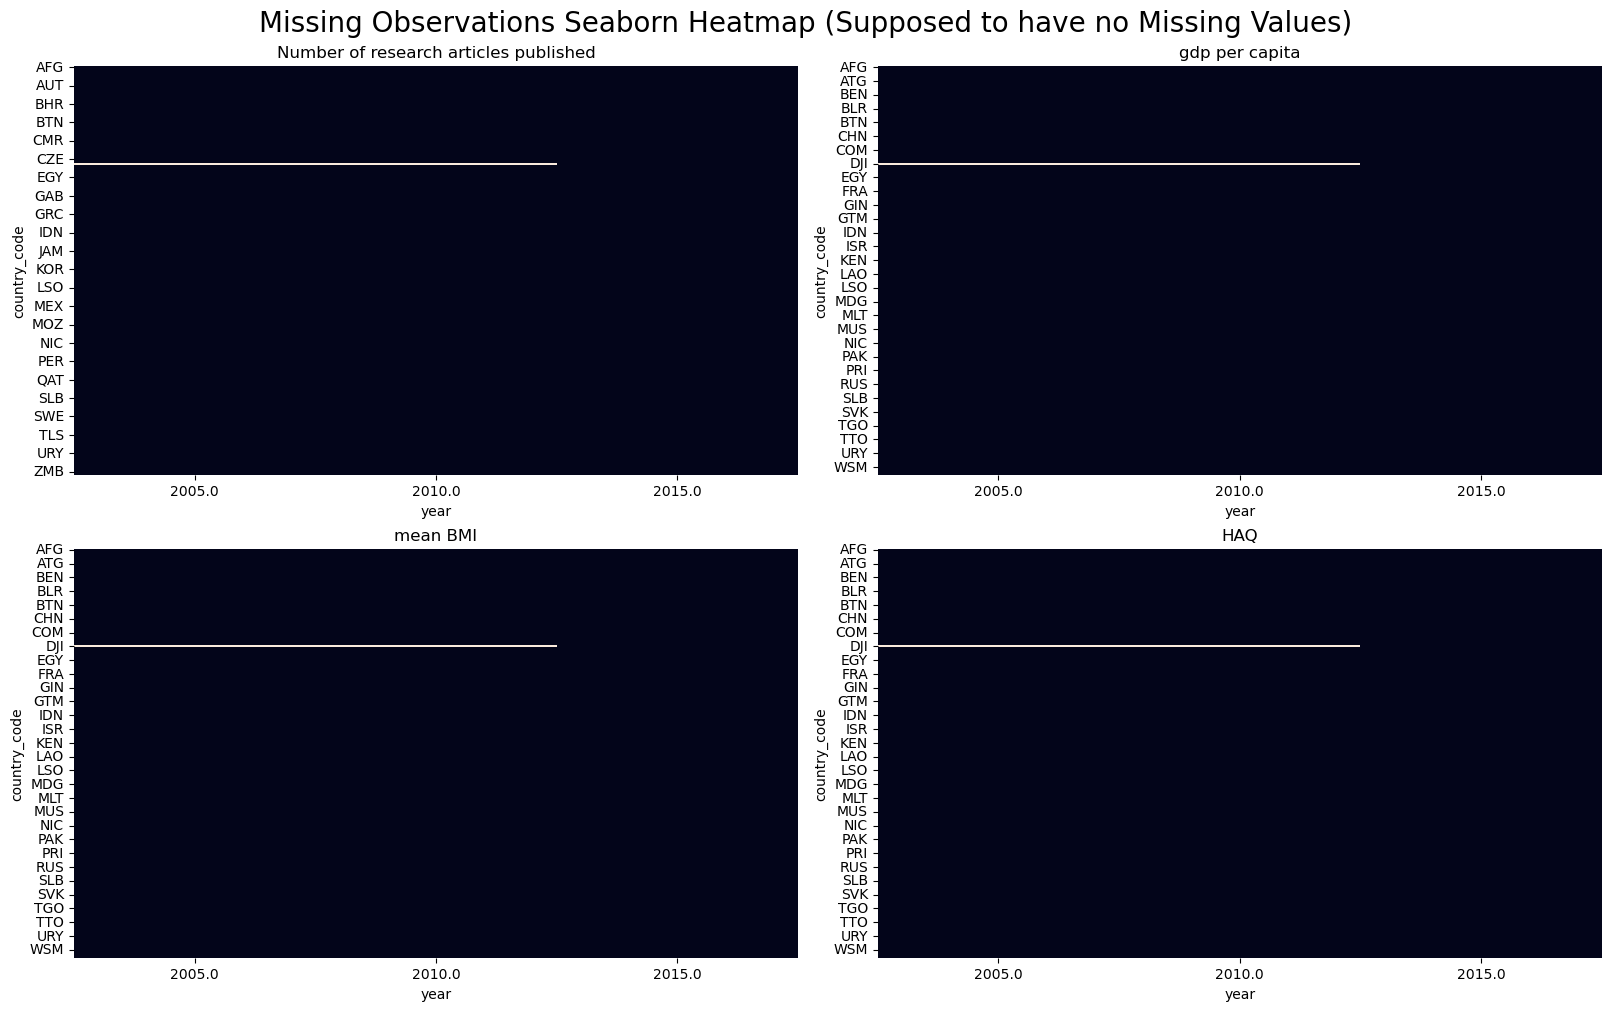

missing values: country_name        0
articles            0
gdp                 0
bmi_men             0
bmi_women           0
bmi_mean            0
haq_index           0
haq_interpolated    0
dtype: int64


In [48]:
# 6.4. 
# Regenerate the same 2 × 2 plot from earlier. Now all of the blocks should be full. 
# You can also confirm that there are no missings using .isna().sum().

# first, pivot every df again
articles_miss_cross=wb_bmi_haq_2002.pivot(index="country_code", columns="year", values="articles")
gdp_miss_cross=wb_bmi_haq_2002.pivot(index="country_code", columns="year", values="gdp")
bmi_miss_cross=wb_bmi_haq_2002.pivot(index="country_code", columns="year", values="bmi_mean")
haq_miss_cross=wb_bmi_haq_2002.pivot(index="country_code", columns="year", values="haq_index")


fig, axes = plt.subplots(2,2,figsize=(16, 10), constrained_layout=True)   
# 2*2 format, "constrained_layout=True" is for the title not to overlap with the plots

# store dfs and titles in lists, otherwise I can't include them in the for loop
miss_dfs=[articles_miss_cross,gdp_miss_cross,bmi_miss_cross,haq_miss_cross]     
titles=["Number of research articles published", "gdp per capita", "mean BMI", "HAQ"]
for i in range(4):
    ax1=axes[i//2,i%2]                                     
    # i//2,i%2 stands for the order of the plots,(0,0) (0,1) (1,0) (1,1)
    # thus, ax1 is the i_th plot    
    # cbar=False: means that there won't be a color bar on the right side    
    sns.heatmap(data=miss_dfs[i].isnull(),cbar=False,ax=ax1)
    ax1.set_xlabel('year')                                 
    ax1.set_ylabel('country_code')   
    ax1.set_title(titles[i])

  
plt.suptitle('Missing Observations Seaborn Heatmap (Supposed to have no Missing Values)', fontsize=20)
plt.show()

print("missing values:",wb_bmi_haq_cross.isna().sum())

In [49]:
# 6.5. 
# The list of countries in the final cross-section, are they all countries?
# The list of variables included, do we have everything we need?

print("The list of countries in the final cross-section")
print(wb_bmi_haq_cross["country_name"].tolist())
# wb_bmi_haq_cross["country_code"] gives error, because it's the index
print("They are roughly all countries, not regions.")
print("The list of variables included")
print(wb_bmi_haq_cross.columns.tolist())
print("Yes, we have everything we need now if we exclude other datasets like rd, mortality and age.")



The list of countries in the final cross-section
['Afghanistan', 'Angola', 'Albania', 'United Arab Emirates', 'Argentina', 'Armenia', 'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bahrain', 'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bolivia', 'Brazil', 'Barbados', 'Brunei Darussalam', 'Bhutan', 'Botswana', 'Central African Republic', 'Canada', 'Switzerland', 'Chile', 'China', "Cote d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica', 'Cyprus', 'Czech Republic', 'Germany', 'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic', 'Algeria', 'Ecuador', 'Egypt, Arab Rep.', 'Spain', 'Estonia', 'Ethiopia', 'Finland', 'Fiji', 'France', 'Micronesia, Fed. Sts.', 'Gabon', 'United Kingdom', 'Georgia', 'Ghana', 'Guinea', 'Gambia, The', 'Guinea-Bissau', 'Equatorial Guinea', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Honduras', 'Croatia', 'Haiti', 'H

---

Adding Cross Sectional Variables

All that remains now is to add age and mortality.

7.1. Rename variables so that they follow the convention (no upper case):
country_code, year, median_age, mortality.

7.2. r&d: Restrict dataset to years ≥ 2010, and aggregate by computing the mean by country.

7.3. age: Restrict dataset to years between 2010 and 2020 inclusive, and aggregate by computing the mean by country.

7.4. Add the new columns to our main dataset by merging using:

on = [country_code, year],
how = ‘‘inner’’.



In [50]:
# 7.1. 
# Rename variables so that they follow the convention: country_code, year, median_age, mortality.

age=age.rename(columns={"Code":"country_code","Entity":"country_name","Year":"year","UN Population Division (Median Age) (2017)":"median_age"})
age.head(10)


,country_name,country_code,year,median_age
0,Afghanistan,AFG,1950,19.400000
1,Afghanistan,AFG,1955,19.200001
2,Afghanistan,AFG,1960,18.799999
3,Afghanistan,AFG,1965,18.400000
4,Afghanistan,AFG,1970,17.900000
5,Afghanistan,AFG,1975,17.400000
6,Afghanistan,AFG,1980,17.000000
7,Afghanistan,AFG,1985,16.299999
8,Afghanistan,AFG,1990,15.900000
9,Afghanistan,AFG,1995,16.000000


In [51]:
mortality=mortality.rename(columns={
    "Code":"country_code",
    "Country":"country_name",
    "Cases":"cases",
    "Deaths":"deaths",
    "Population":"population",
    "Mortality":"mortality"})
mortality.head(10)

,country_name,country_code,cases,deaths,population,mortality
0,World,NaN,159634316,3318844.0,7.757957e+09,0.020790
1,USA,USA,33515308,596179.0,3.326644e+08,0.017788
2,India,IND,22992517,250025.0,1.391605e+09,0.010874
3,Brazil,BRA,15214030,423436.0,2.138525e+08,0.027832
4,France,FRA,5780379,106684.0,6.539730e+07,0.018456
5,Turkey,TUR,5044936,43311.0,8.511479e+07,0.008585
6,Russia,RUS,4896842,113976.0,1.459881e+08,0.023275
7,UK,GBR,4437217,127609.0,6.819137e+07,0.028759
8,Italy,ITA,4116287,123031.0,6.038555e+07,0.029889
9,Spain,ESP,3581392,78895.0,4.677031e+07,0.022029


In [52]:
rd.head(10)
# rd already has no upper cases in column names.

,country_code,year,rd
0,AUS,2013,33471500.0
1,AUS,2015,31179000.0
2,AUS,2017,33062000.0
3,AUT,2013,9571282.0
4,AUT,2014,10275180.0
5,AUT,2015,10499146.0
6,AUT,2016,11135560.0
7,AUT,2017,11289781.0
8,AUT,2018,12246010.0
9,AUT,2019,12799700.0


In [53]:
# 7.2. r&d: Restrict dataset to years ≥ 2010, and aggregate by computing the mean by country.
rd_2010=rd.loc[lambda x:x["year"]>=2010]

rd_2010_mean=rd_2010.groupby('country_code').agg({
    "rd":"mean"
})
# rd_2010_mean

# I don't understand why there are 5 digits in column "country_code". They are also in the original rd data.
# So I dropped these rows (strangely, those 5 digits are also objects)

rd_2010_mean=rd_2010_mean[rd_2010_mean.index.str.len()<=4]
rd_2010_mean.head(10)

,rd
country_code,
AGO,5.465642e+05
ARE,3.256343e+06
ARG,5.306104e+06
ARM,1.479402e+06
AUS,1.204560e+07
AUT,4.163768e+06
AZE,8.775630e+04
BDI,1.157127e+06
BEL,3.827969e+06


In [54]:
# 7.3. age: Restrict dataset to years between 2010 and 2020 inclusive, and aggregate by computing the mean by country.
age_10_20=age.loc[lambda x:(x["year"]>=2010)&(x["year"]<=2020)]
age_10_20_mean=age_10_20.groupby('country_code').agg({
    "country_name":"first",
    "median_age":"mean"
})
age_10_20_mean.head(10)

,country_name,median_age
country_code,,
ABW,Aruba,39.900000
AFG,Afghanistan,17.300000
AGO,Angola,16.499999
ALB,Albania,35.500000
ARE,United Arab Emirates,33.100001
ARG,Argentina,30.866666
ARM,Armenia,34.166668
ATG,Antigua and Barbuda,30.699999
AUS,Australia,37.400002


In [55]:
# 7.4. 
# Add the new columns to our main dataset by merging using: on = [country_code, year], how = inner.

# I don't understand why merging also on "year" here, because "year" should already be excluded in all datasets
# So I only merged on "country_code"

wb_bmi_haq_rd=pd.merge(wb_bmi_haq_cross,rd_2010_mean,on = ["country_code"], how = 'inner')
wb_bmi_haq_rd_age=pd.merge(wb_bmi_haq_rd,age_10_20_mean,on = ["country_code"], how = 'inner')
wb_all=pd.merge(wb_bmi_haq_rd_age,mortality,on = ["country_code"], how = 'inner')
wb_all=wb_all.drop(columns=["country_name_y"])


In [56]:
wb_all=wb_all.rename(columns={"country_name_x":"country_name"})
wb_all.head(10)

,country_code,country_name,articles,gdp,bmi_men,bmi_women,bmi_mean,haq_index,haq_interpolated,rd,median_age,country_name,cases,deaths,population,mortality
0,AGO,Angola,18.770000,7313.022684,21.986208,23.653124,22.819666,38.000000,38.000000,5.465642e+05,16.499999,Angola,28875,636.0,33733691.0,0.022026
1,ARE,United Arab Emirates,1421.340000,70345.157155,27.680195,29.265680,28.472937,70.866667,70.866667,3.256343e+06,33.100001,UAE,537524,1615.0,9992499.0,0.003005
2,ARG,Argentina,6857.026667,22293.864479,27.423407,27.135526,27.279467,66.766667,66.766667,5.306104e+06,30.866666,Argentina,3165121,67821.0,45550456.0,0.021428
3,ARM,Armenia,468.933333,9342.463573,25.303485,27.031694,26.167589,63.733333,63.733333,1.479402e+06,34.166668,Armenia,219596,4256.0,2967990.0,0.019381
4,AUS,Australia,41993.786667,45087.929051,27.461848,26.639090,27.050469,88.066667,88.066667,1.204560e+07,37.400002,Australia,29938,910.0,25752709.0,0.030396
5,AUT,Austria,10975.943333,51458.304744,26.441687,24.621197,25.531442,86.166667,86.166667,4.163768e+06,43.166668,Austria,632766,10413.0,9050395.0,0.016456
6,AZE,Azerbaijan,465.143333,12129.567581,25.687491,27.479442,26.583467,59.933333,59.933333,8.775630e+04,30.466667,Azerbaijan,327087,4698.0,10217339.0,0.014363
7,BDI,Burundi,9.936667,823.359932,21.543465,21.128354,21.335909,38.800000,38.800000,1.157127e+06,17.566667,Burundi,4200,6.0,12191404.0,0.001429
8,BEL,Belgium,14903.900000,48075.816709,26.590675,25.572625,26.081650,86.266667,86.266667,3.827969e+06,41.333333,Belgium,1017876,24583.0,11632825.0,0.024151
9,BFA,Burkina Faso,142.630000,1722.903872,21.867992,21.741340,21.804666,41.966667,41.966667,4.023841e+06,17.100000,Burkina Faso,13382,162.0,21390267.0,0.012106


---

---

#### Part II: Regression Analysis

If you are unsure that you followed the earlier steps correctly, you can use the provided analysis-ready dataset. Use White standard errors for all regressions.

Exploratory Analysis

1.1. Run a naive simple linear regression of mortality on articles. Call this model0.

1.2. Produce four density plots (2-by-2 layout) for:
Mortality, GDP per Capita, R&D Spending, Articles.

Use seaborn.kdeplot. What do these distributions all have in common?

1.3. Use plotnine to produce 4 scatter plots with fitted regression lines using method = ‘‘loess’’ for the following pairs:
- (a)	GDP per Capita vs. Mortality,
- (b)	Same, but both in log scale.
- (c)	Articles vs. Mortality, also both in log scale.
- (d)	R&D Spending vs. Mortality, also both in log scale.


In [57]:
# 1.1. 
# Run a naive simple linear regression of mortality on articles. Call this model0.

# I used the provided cross_section data for the next steps
cross_all=pd.read_csv("analysis_ready_cross_section_data.csv")
# cross_all
model0 = smf.ols("mortality ~ articles", data=cross_all).fit()
print(model0.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     2.381
Date:                Tue, 09 Dec 2025   Prob (F-statistic):              0.125
Time:                        13:54:08   Log-Likelihood:                 358.16
No. Observations:                 122   AIC:                            -712.3
Df Residuals:                     120   BIC:                            -706.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0190      0.001     15.423      0.0

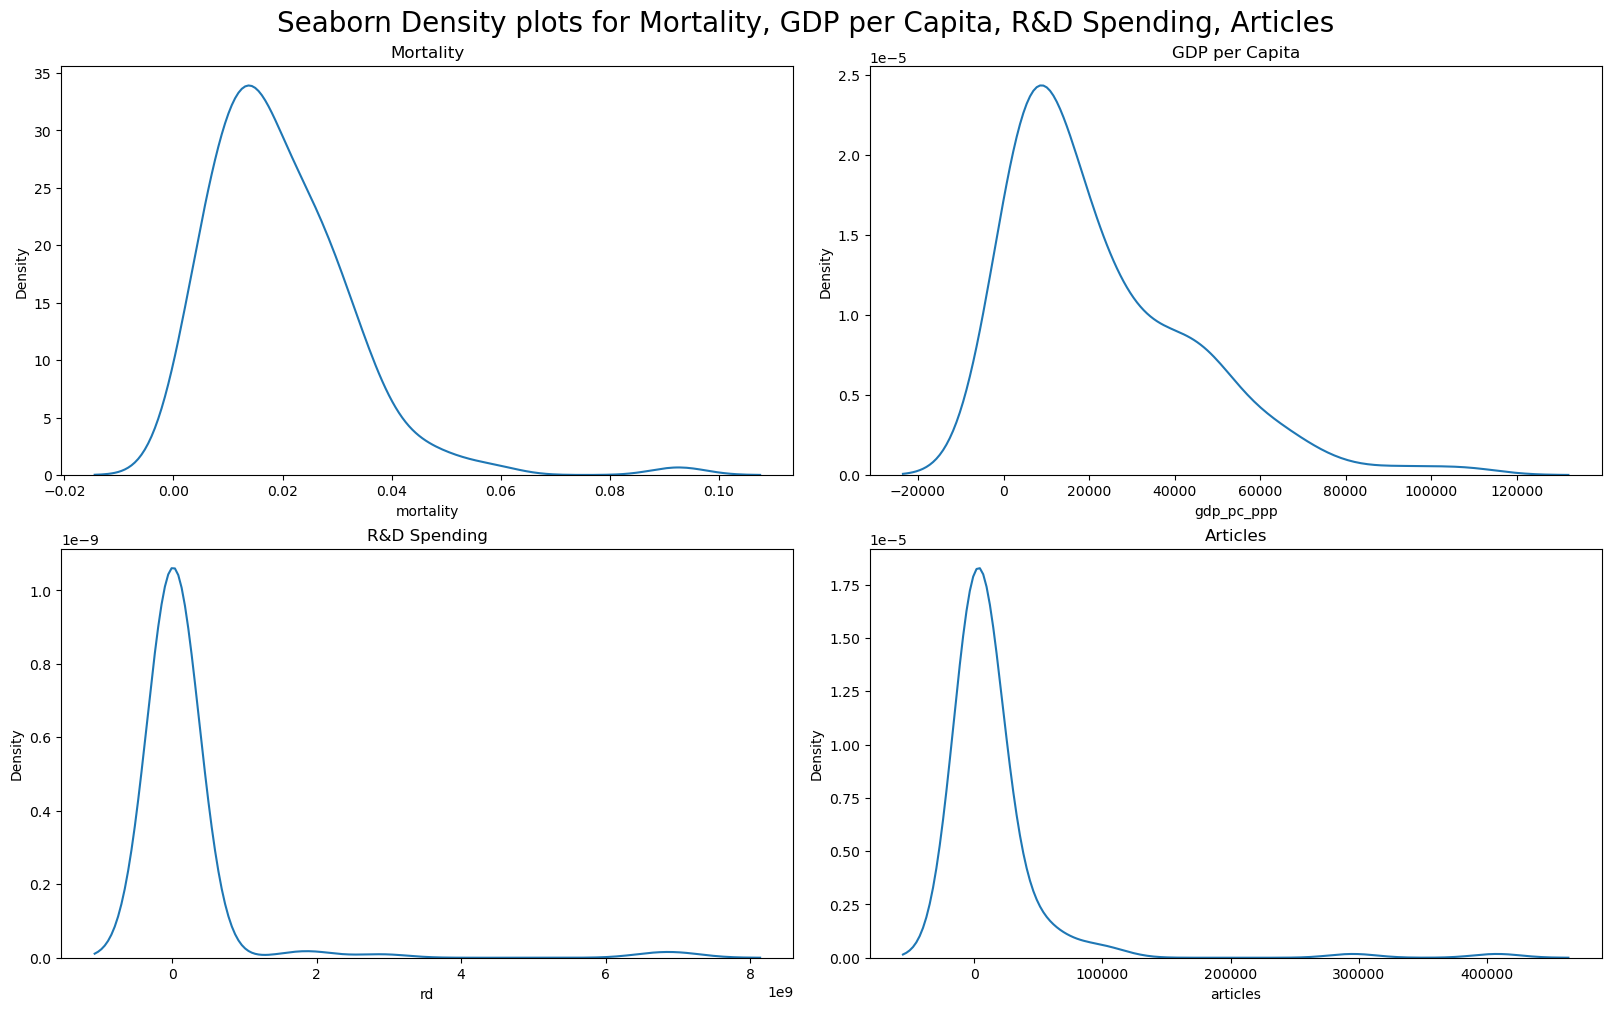

What do these distributions all have in common?
The four distributions are all very right-skewed.
The Mortality, GDP per Capita, R&D Spending, and Articles of the majority of countries are within a certain range, with only a few countries having extremely high values.


In [58]:
# 1.2. 
# Produce four density plots (2-by-2 layout) for: Mortality, GDP per Capita, R&D Spending, Articles.
# Use seaborn.kdeplot. What do these distributions all have in common?


fig, axes = plt.subplots(2,2,figsize=(16, 10), constrained_layout=True)   
# 2*2 format, "constrained_layout=True" is for the title not to overlap with the plots

# store dfs and titles in lists, otherwise I can't include them in the for loop
density_dfs=[cross_all["mortality"],cross_all["gdp_pc_ppp"],cross_all["rd"],cross_all["articles"]]
titles=["Mortality", "GDP per Capita", "R&D Spending", "Articles"]

for i in range(4):
    ax1=axes[i//2,i%2]                                     
    # i//2,i%2 stands for the order of the plots,(0,0) (0,1) (1,0) (1,1)    
    sns.kdeplot(data=cross_all, x=density_dfs[i], ax=ax1)
    ax1.set_title(titles[i])

  
plt.suptitle('Seaborn Density plots for Mortality, GDP per Capita, R&D Spending, Articles', fontsize=20)
plt.show()

print("What do these distributions all have in common?")
print("The four distributions are all very right-skewed.")
print("The Mortality, GDP per Capita, R&D Spending, and Articles of the majority of countries are within a certain range, with only a few countries having extremely high values.")


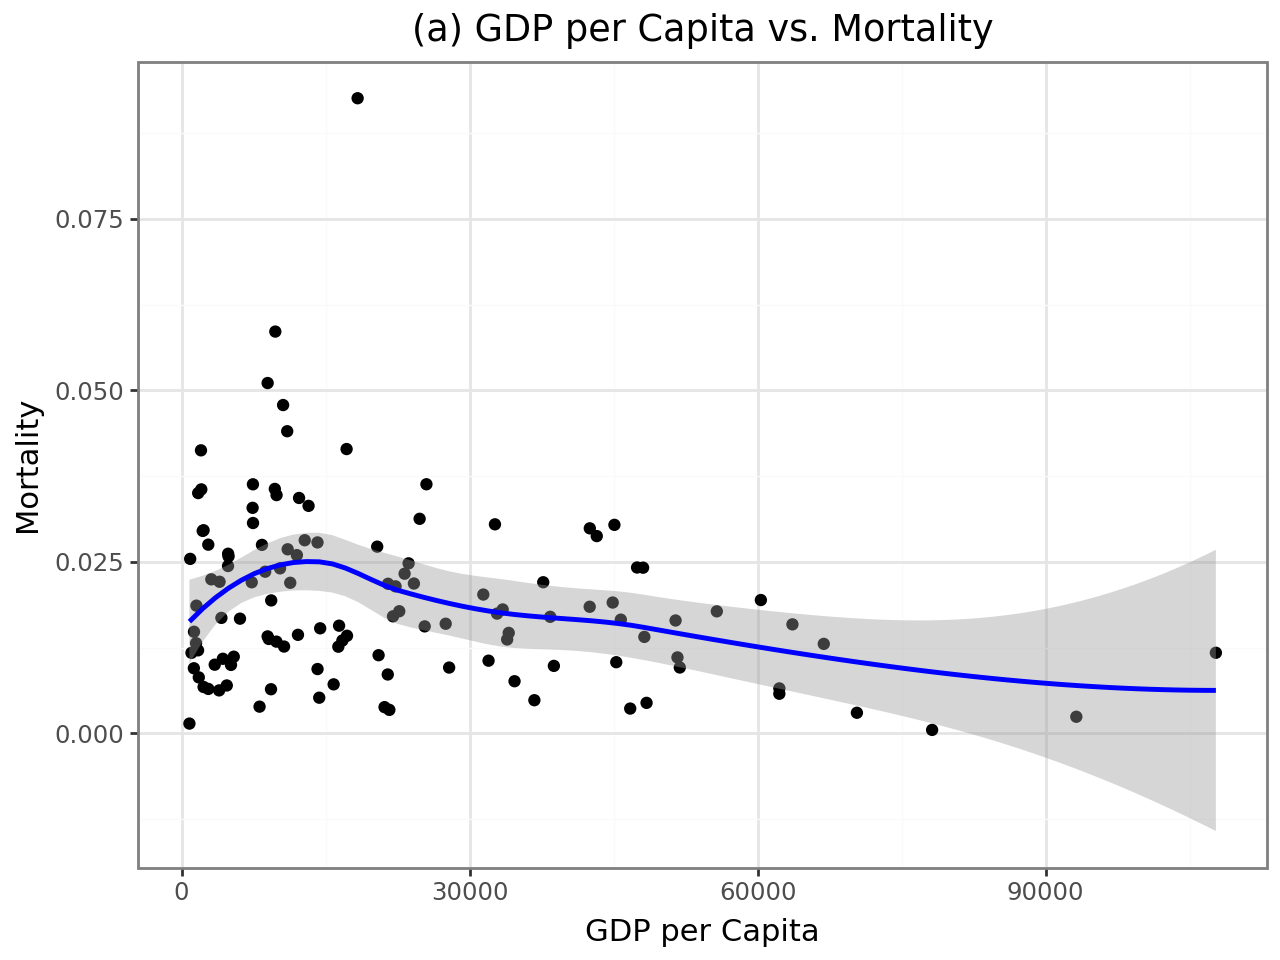

In [59]:
# 1.3. 
# Use plotnine to produce 4 scatter plots with fitted regression lines using method = "loess"
# (a) GDP per Capita vs. Mortality
pa=(
    ggplot(cross_all, aes(x="gdp_pc_ppp", y="mortality"))
    + geom_point()
    + geom_smooth(method="loess", color = "blue")
    + labs(x="GDP per Capita", y="Mortality")
    + ggtitle("(a) GDP per Capita vs. Mortality")
    + theme_bw()
)
pa


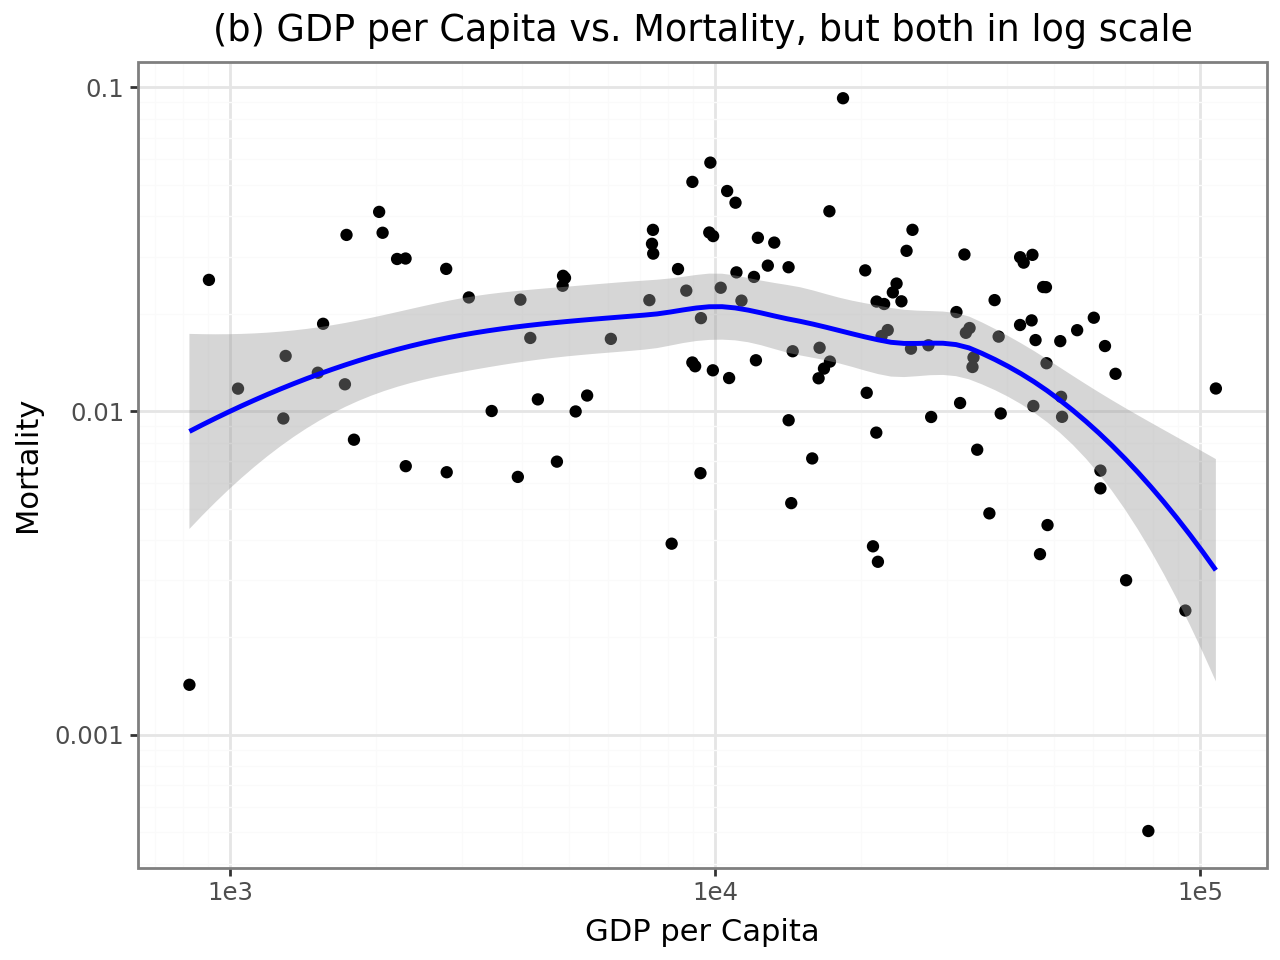

In [60]:
# (b) Same, but both in log scale.

pb=(
    ggplot(cross_all, aes(x="gdp_pc_ppp", y="mortality"))
    + geom_point()
    + geom_smooth(method="loess", color = "blue")
    + labs(x="GDP per Capita", y="Mortality")
    + ggtitle("(b) GDP per Capita vs. Mortality, but both in log scale")
    + scale_x_log10()
    + scale_y_log10()
    + theme_bw()
)
pb

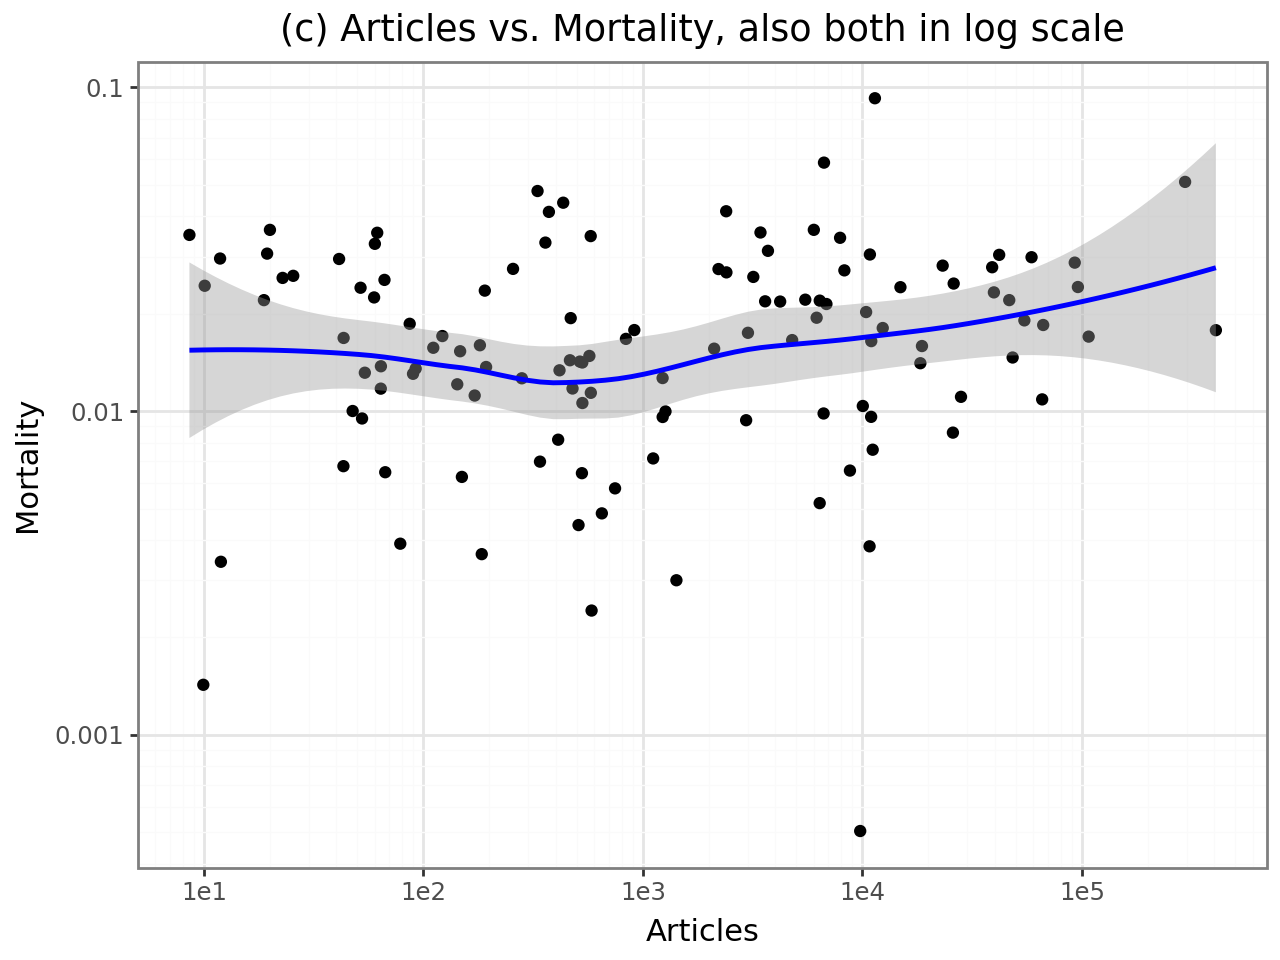

In [61]:
# (c) Articles vs. Mortality, also both in log scale.

pc=(
    ggplot(cross_all, aes(x="articles", y="mortality"))
    + geom_point()
    + geom_smooth(method="loess", color = "blue")
    + labs(x="Articles", y="Mortality")
    + scale_x_log10()
    + scale_y_log10()
    + ggtitle("(c) Articles vs. Mortality, also both in log scale")
    + theme_bw()
)
pc

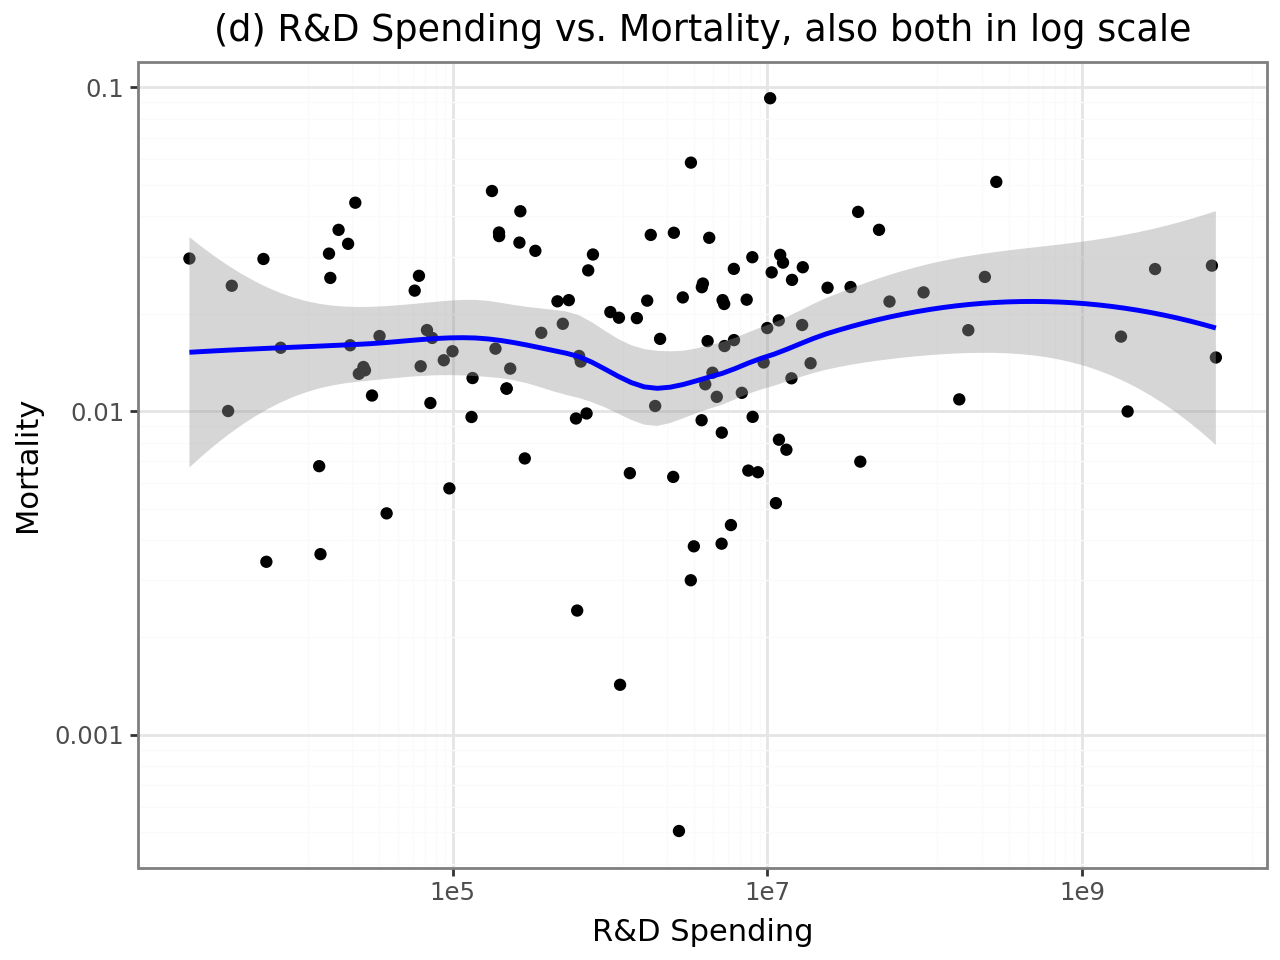

In [62]:
# (d) R&D Spending vs. Mortality, also both in log scale.

p_d=(
    ggplot(cross_all, aes(x="rd", y="mortality"))
    + geom_point()
    + geom_smooth(method="loess", color = "blue")
    + labs(x="R&D Spending", y="Mortality")
    + scale_x_log10()
    + scale_y_log10()
    + ggtitle("(d) R&D Spending vs. Mortality, also both in log scale")
    + theme_bw()
)
p_d



---

Feature Engineering

2.1. Apply a log transformation to all 4 variables:
Mortality, GDP per Capita, R&D Spending, Articles.

2.2. Generate two variables: log of GDP squared, and log of articles squared.

In [63]:
# 2.1. 
# Apply a log transformation to all 4 variables: Mortality, GDP per Capita, R&D Spending, Articles.

cross_all["ln_mortality"] = np.log(cross_all["mortality"])
cross_all["ln_gdp_pc_ppp"] = np.log(cross_all["gdp_pc_ppp"])
cross_all["ln_articles"] = np.log(cross_all["articles"])
cross_all["ln_rd"] = np.log(cross_all["rd"])


In [64]:
# 2.2. 
# Generate two variables: log of GDP squared, and log of articles squared.

cross_all["ln_gdp_sq"] = cross_all["ln_gdp_pc_ppp"] ** 2
cross_all["ln_articles_sq"] = cross_all["ln_articles"] ** 2

---

Comparing Models

3.1. Estimate the following regressions using statsmodels with heteroskedasticity-robust standard errors (HC1):
Regress log of mortality on:
- log articles and log articles squared
- log rd
- log articles, log articles squared, log gdp, and log gdp squared
- Same from previous model plus haq, bmi, age
- Same as previous model plus log rd

3.2. Present the regression results in a table using Stargazer.
Customize the order of variables so that the table reads clearly e.g.

regression_table.covariate_order([
    "const",
    "log_articles", "log_articles2", "log_rd",
    "log_gdp_pc_ppp", "log_gdp2",
    "median_age",
    "bmi_mean",
    "haq"
])

3.3. Write a small discussion about the results and what you learned in this exercise.


In [65]:
# 3.1. 
# Estimate the following regressions using statsmodels HC1: Regress log of mortality on:
# - log articles and log articles squared

model1 = smf.ols("ln_mortality ~ ln_articles + ln_articles_sq", data=cross_all).fit(cov_type ="HC1")
print(model1.summary())


                            OLS Regression Results                            
Dep. Variable:           ln_mortality   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     4.045
Date:                Tue, 09 Dec 2025   Prob (F-statistic):             0.0200
Time:                        13:54:12   Log-Likelihood:                -138.68
No. Observations:                 122   AIC:                             283.4
Df Residuals:                     119   BIC:                             291.8
Df Model:                           2                                         
Covariance Type:                  HC1                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -3.7838      0.616     -6.

In [66]:
# HC1: Regress log of mortality on:
# - log rd

model2 = smf.ols("ln_mortality ~ ln_rd", data=cross_all).fit(cov_type ="HC1")
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:           ln_mortality   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.7038
Date:                Tue, 09 Dec 2025   Prob (F-statistic):              0.403
Time:                        13:54:12   Log-Likelihood:                -140.51
No. Observations:                 122   AIC:                             285.0
Df Residuals:                     120   BIC:                             290.6
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.3902      0.272    -16.125      0.0

In [67]:
# HC1: Regress log of mortality on:
# - log articles, log articles squared, log gdp, and log gdp squared
model3 = smf.ols("ln_mortality ~ ln_articles + ln_articles_sq + ln_gdp_pc_ppp + ln_gdp_sq", data=cross_all).fit(cov_type ="HC1")
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:           ln_mortality   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     6.735
Date:                Tue, 09 Dec 2025   Prob (F-statistic):           6.49e-05
Time:                        13:54:12   Log-Likelihood:                -123.53
No. Observations:                 122   AIC:                             257.1
Df Residuals:                     117   BIC:                             271.1
Df Model:                           4                                         
Covariance Type:                  HC1                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -19.2274      5.061     -3.

In [68]:
# - Same from previous model plus haq, bmi, age
model4 = smf.ols("ln_mortality ~ ln_articles + ln_articles_sq + ln_gdp_pc_ppp + ln_gdp_sq + haq + bmi_mean + median_age", data=cross_all).fit(cov_type ="HC1")
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:           ln_mortality   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     4.442
Date:                Tue, 09 Dec 2025   Prob (F-statistic):           0.000212
Time:                        13:54:12   Log-Likelihood:                -120.02
No. Observations:                 122   AIC:                             256.0
Df Residuals:                     114   BIC:                             278.5
Df Model:                           7                                         
Covariance Type:                  HC1                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -15.9274      5.419     -2.

In [69]:
# - Same as previous model plus log rd
model5 = smf.ols("ln_mortality ~ ln_articles + ln_articles_sq + ln_gdp_pc_ppp + ln_gdp_sq + haq + bmi_mean + median_age + ln_rd", data=cross_all).fit(cov_type ="HC1")
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:           ln_mortality   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                     3.885
Date:                Tue, 09 Dec 2025   Prob (F-statistic):           0.000444
Time:                        13:54:13   Log-Likelihood:                -119.89
No. Observations:                 122   AIC:                             257.8
Df Residuals:                     113   BIC:                             283.0
Df Model:                           8                                         
Covariance Type:                  HC1                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -15.7428      5.341     -2.

In [70]:
# 3.2. 
# Present the regression results in a table using Stargazer.
# Customize the order of variables so that the table reads clearly

regression_table = Stargazer([model0, model1, model2, model3, model4, model5])

regression_table.custom_columns(
    [
        "mortality on articles",
        "mortality on ln(articles) and ln(articles)^2",
        "mortality on ln(rd)",
        "mortality on ln(articles), ln(articles)^2, ln(gdp), and ln(gdp)^2",
        "mortality on Same as previous + haq, bmi, age",
        "mortality on Same as previous + ln(rd)"
    ],
    [1, 1, 1, 1,1,1],
)

regression_table.covariate_order([
    "Intercept",
    "ln_articles", 
    "ln_articles_sq", 
    "ln_rd",
    "ln_gdp_pc_ppp", 
    "ln_gdp_sq",
    "median_age",
    "bmi_mean",
    "haq",
    "articles"
])

regression_table.rename_covariates({"Intercept": "const"})

regression_table

### 3.3. Write a small discussion about the results and what you learned in this exercise.

#### Discussion about the Results:

The first two models in the Stargazer table are about the relationship between mortality and the number of scientific articles published. Either the estimated parameters are almost zero, or the standard error is larger. The R_squares of these two models are also very low. Thus we can say that mortality and the number of scientific articles published are hardly correlated with each other.

The third model is about the regression of mortality on log of R&D. and the estimated parameter is 0.015, which is almost zero. The R_square of the model is even lower. Thus we can say that mortality and log of R&D are basically independent with each other.

Excluding articles and R&D, we can see in the fourth model that log of gdp per capita has a significant positive relationship with mortality, while the square of it has a significant negative relationship with mortality. We can say they are "significant" because the estimated parameters both have three stars on the top right side, showing very small p_values. So the function should be concave (the opposite of U shape). This might suggests that only when gdp is high enough to a certain extent, will it be able to result with a lower mortality level.

We can see in the fifth and sixth model that the newly added variables median_age and haq are not so correlated with mortality because their estimated parameters are nearly zero. But bmi_mean has a significant positive relationship with mortality, which is of a certain significance. This makes sense, because we know through common knowledge that obesity can only be a negative factor for health.

#### What I learned in this exercise:

I got a deeper understanding of the basic process of a complete cross-sectional data regression work. This includes the following steps in this exercise:

1. Load data, check data and variables/columns, turn column names into lower_cases, changing format

This may involve:

- df.filter(["column1", "column2"]).head(5)
- df.drop(columns=['column3'])
- print(df.columns.tolist())
- df.iloc[:, 4:].head(5)             # from the fifth column to the end
- df_long=pd.melt(df, id_vars=["Country Code", "Country Name"], var_name="year", value_name="value")

(inside pd.melt: (drop unrelated columns first)<br>
id_vars=["Country Code","Country Name"]: means that "Country Code","Country Name" will still be columns in df_long<br>
var_name="year": means that in df_long, there will be a new column "year" for all other column names<br>
value_name="value": just saves all the values into a new column "value" in df_long)<br>

- df=df.rename(columns={"Column 1":"column_1","Column 2":"column_2"})

- df_short=pd.pivot_table(df, 
    index=["columns that I want to keep as columns"], 
    columns="the column that I want to split into different columns by values(categories)", 
    values="all the values"
    ).reset_index().rename(columns={
    "category1":"column1",
    "category2":"column2"
    })

- df_pivoted=df.pivot(index="columns that I want to keep as columns", 
    columns="the column that I want to split into different columns by values(categories)", 
    values="all the values")


2. check the common column/variable for merging

This may involve:

- for code in df1["country_code"].unique():
    if (code in df2["country_code"].unique())==False:
        articles_gdp.append(code)               # print the list of unmatched rows

- df["year"]=df["year"].astype(float)           # change the dtype for merging
- print(len(df[['country_code','year']].drop_duplicates()))         # check unrepeated key_pairs


3. merge dataframes and check missing values with seaborn heatmap

This may involve:

- df_all=pd.merge(df1,df2,on = ["country_code", "year"],how = 'outer')

- fig, axes = plt.subplots(2,2,figsize=(16, 10), constrained_layout=True)   

for i in range(4):
    ax1=axes[i//2,i%2]                                     
    ( i//2,i%2 stands for the order of the plots,(0,0) (0,1) (1,0) (1,1)<br>
     thus, ax1 is the i_th plot    <br>
     cbar=False: means that there won't be a color bar on the right side )<br>
    sns.heatmap(data=miss_dfs[i].isnull(),cbar=False,ax=ax1)

- df_2002=df.loc[lambda x:x['year']>=2002]
- df_crash_years=df.groupby("country_code").agg({
    "country_name":"first",             
    ( country_name is the same for each country_code, so the best way is just to take first   ) 
    "gdp":"mean",
    "haq_interpolated":"mean"
})
- df.isna().sum()
- df=df[df.index.str.len()<=4]

4. scatter plots with fitted lines using loess method

This may involve:

- pa=(
    ggplot(cross_all, aes(x="mortality", y="gdp_pc_ppp"))
    + geom_point()
    + geom_smooth(method="loess", color = "blue")
    + scale_x_log10()               # in log scale
    + scale_y_log10()
    + labs(x="Mortality", y="GDP per Capita")
    + ggtitle("(a) GDP per Capita vs. Mortality")
    + theme_bw()
)

5. result tables with stargazer 

This may involve:

- model1 = smf.ols("ln_mortality ~ ln_articles + ln_articles_sq", data=cross_all).fit(cov_type ="HC1")
- print(model1.summary())

- table = Stargazer([model1, model2, model3, model4, model5])
- table.custom_columns(
    [
        "mortality on articles",
        "mortality on ln(articles) and ln(articles)^2",
        "mortality on ln(rd)",
        "mortality on ln(articles), ln(articles)^2, ln(gdp), and ln(gdp)^2",
        "mortality on Same as previous + haq, bmi, age"
    ],
    [1, 1, 1, 1,1],
)

- regression_table.covariate_order([
    "Intercept",
    "ln_articles", 
    "ln_articles_sq", 
    "ln_rd",
    "ln_gdp_pc_ppp", 
    "ln_gdp_sq",
    "median_age",
    "bmi_mean",
    "haq",
    "articles"
])
